<a href="https://colab.research.google.com/github/nvg14/neural-networks/blob/main/dry_beans_mlpclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from time import time
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.preprocessing import MinMaxScaler,StandardScaler, PowerTransformer, PolynomialFeatures
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("drive/MyDrive/Colab Notebooks/Dry_Bean_Dataset.xlsx")
# df = df.dropna(how='any', axis = 0)

In [ ]:
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
df.duplicated(subset=None, keep='first').sum()

68

In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = df.drop(columns=['Class']).columns
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify = df['Class'])
train_df, val_df = train_test_split(train_df, test_size=0.05, random_state=42, stratify = train_df['Class'])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
train_df = train_df[train_df['Eccentricity'] >= 0.25]
train_df = train_df[train_df['Solidity'] >= 0.94]
train_df = train_df[train_df['roundness'] >= 0.53]
train_df = train_df[train_df['ShapeFactor4'] >= 0.96]

In [ ]:
X_train = train_df[features]
y_train = train_df['Class']

X_val = val_df[features]
y_val = val_df['Class']

X_test = test_df[features]
y_test = test_df['Class']

In [ ]:
cols = ['Area', 'ConvexArea','MajorAxisLength','Perimeter','MinorAxisLength','EquivDiameter','Eccentricity',
                'ShapeFactor2','Extent','roundness','AspectRation','Compactness','ShapeFactor1','ShapeFactor3',
               'ShapeFactor4','Solidity']

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train[cols])
X_train[cols] = pd.DataFrame(X_train_scaled, index=X_train.index)

X_val_scaled = sc.transform(X_val[cols])
X_val[cols] = pd.DataFrame(X_val_scaled, index=X_val.index)

X_test_scaled = sc.transform(X_test[cols])
X_test[cols] = pd.DataFrame(X_test_scaled, index=X_test.index)

In [ ]:
X_train = X_train.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                                'Perimeter','AspectRation'])
X_val = X_val.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                            'Perimeter','AspectRation'])
X_test = X_test.drop(columns=['ShapeFactor1','ShapeFactor3','Compactness','EquivDiameter','Area',
                            'Perimeter','AspectRation'])

In [ ]:
model_mlp= MLPClassifier(random_state=1, max_iter=500, alpha=0.005)
model_mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.005, max_iter=500, random_state=1)

In [ ]:
from sklearn import metrics
print("Train F1_Score: ", metrics.f1_score(y_train, model_mlp.predict(X_train), average='micro'))
print("Val F1_Score: ", metrics.f1_score(y_val, model_mlp.predict(X_val), average='micro'))
accuracy_score(y_val, model_mlp.predict(X_val))

Train F1_Score:  0.9421215640727836
Val F1_Score:  0.9394495412844037


0.9394495412844037

In [ ]:
accuracy_score(y_test, model_mlp.predict(X_test))

0.9269188395152406

In [ ]:
i = 0
df_acc = pd.DataFrame(columns = ['alpha','max_iter','train_acc','test_acc','train_time'])
for a in [0.00001,0.0001,0.001,0.01, 0.1, 1, 10, 0.005]:
    for mi in [10,100,200,500,1000,2000]:
        st = time()
        mlp = MLPClassifier(alpha=a, max_iter=mi)
        mlp.fit(X_train, y_train)
        end = time() - st

        acc_tr = accuracy_score(y_val, mlp.predict(X_val)) # Train Accuracy
        acc = accuracy_score(y_test, mlp.predict(X_test)) # Test Accuracy
        df_acc.loc[i] = [a,mi,acc_tr,acc,end]
        i=i+1

In [ ]:
df_acc

,alpha,max_iter,train_acc,test_acc,train_time
0,0.00001,10.0,0.930275,0.920308,0.607840
1,0.00001,100.0,0.943119,0.925817,2.830331
2,0.00001,200.0,0.939450,0.926184,6.052517
3,0.00001,500.0,0.941284,0.928755,5.657713
4,0.00001,1000.0,0.946789,0.927286,10.001711
5,0.00001,2000.0,0.943119,0.927286,6.257159
6,0.00010,10.0,0.928440,0.916269,0.394526
7,0.00010,100.0,0.941284,0.927286,3.365434
8,0.00010,200.0,0.943119,0.928755,5.077657
9,0.00010,500.0,0.937615,0.929490,10.166478


In [ ]:
from time import time

In [ ]:
acc = []
acc_tr = []
timelog = []
for l in [10,20,50,100,200,500,1000]:
    t = time()
    mlp = MLPClassifier(alpha=0.005, max_iter=500, hidden_layer_sizes=(l,))
    mlp.fit(X_train, y_train)
    endt = time() - t
    a_tr = accuracy_score(y_val, mlp.predict(X_val))
    a = accuracy_score(y_test, mlp.predict(X_test))

    acc_tr.append(a_tr)
    acc.append(a)
    timelog.append(endt)

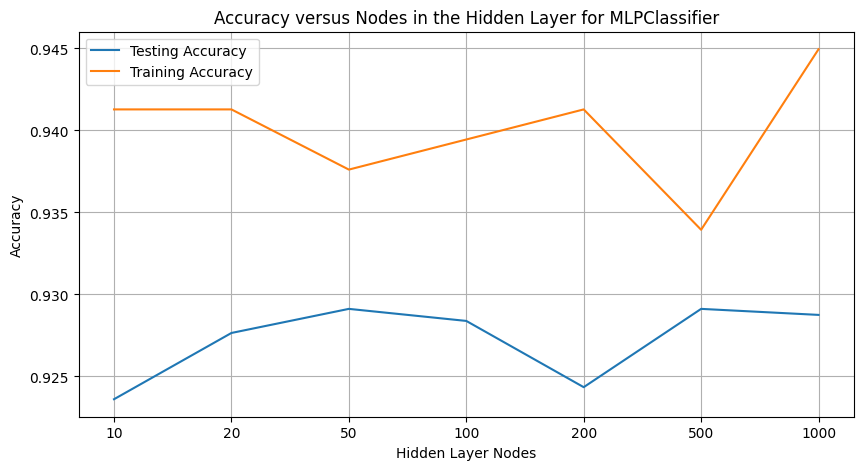

In [ ]:
l = [10,20,50,100,200,500,1000]
N = len(l)
l2 = np.arange(N)
matplot.subplots(figsize=(10, 5))
matplot.plot(l2, acc, label="Testing Accuracy")
matplot.plot(l2, acc_tr, label="Training Accuracy")
matplot.xticks(l2,l)
matplot.grid(True)
matplot.xlabel("Hidden Layer Nodes")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus Nodes in the Hidden Layer for MLPClassifier', fontsize=12)
matplot.show()

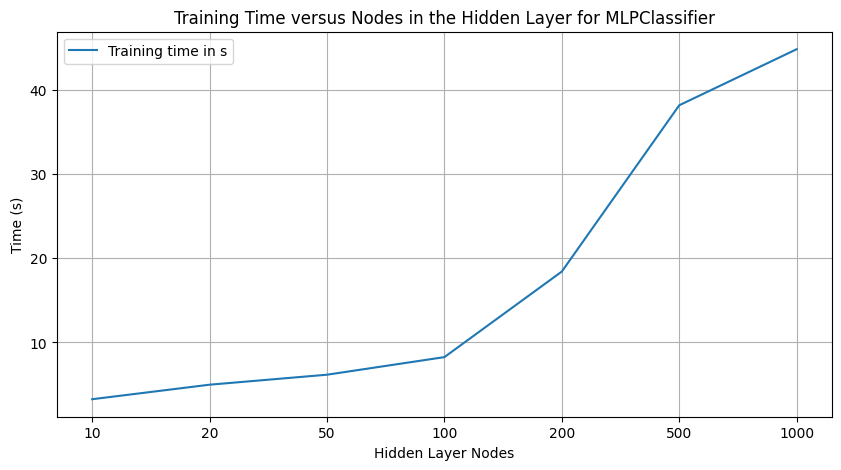

In [ ]:
l = [10,20,50,100,200,500,1000]
N = len(l)
l2 = np.arange(N)
matplot.subplots(figsize=(10, 5))
matplot.plot(l2, timelog, label="Training time in s")
matplot.xticks(l2,l)
matplot.grid(True)
matplot.xlabel("Hidden Layer Nodes")
matplot.ylabel("Time (s)")
matplot.legend()
matplot.title('Training Time versus Nodes in the Hidden Layer for MLPClassifier', fontsize=12)
matplot.show()